In [1]:
import anndata
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import math
import pickle
import seaborn as sns
import scipy
import sys
import scanpy as sc
import pandas as pd

from scbasset.utils import *
from analyse_function.py import *

2024-04-08 09:36:23.552811: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 09:36:23.591444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 09:36:23.591474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 09:36:23.592528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 09:36:23.598511: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 09:36:23.599009: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Choices

In [2]:
###### filtered or not ######
filter_info = 'filtered'
#filter_info = 'not_filtered'

##### model #####
model_info = 'l2_regularization/0_5'
#model_info = 'l2_regularization/1'
#model_info = 'focal_loss/'

## Enhancer

In [3]:
type_data = 'enhancer'

## Promotor

In [4]:
type_data = 'promotor'

## Enhancer and promotor

In [41]:
type_data = 'enhancer_promotor'

# Import data

In [5]:
path = f'../../../results_scbasset/{type_data}_final'

trained_model = f'{path}/model/{model_info}/{filter_info}/best_model.h5'
motif_fasta_folder = '/home/pascal/Stage_Norvege2/SSHFS/scBasset/data/downloads/Homo_sapiens_motif_fasta'
ad_file = f'{path}/model/{model_info}/{filter_info}/results/cage_{type_data}_ad_embedding.h5ad'

### load the data and trained model

In [6]:
# read the patient annotations
ad = anndata.read_h5ad(ad_file)
sc.pp.normalize_total(ad, target_sum=1e6)
sc.pp.log1p(ad)

# load model
model = load_model(ad, trained_model)

2024-04-08 09:36:47.694077: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### score a TF of interest

In [10]:
motif = 'E2F1'
scores = motif_score(motif , model, motif_fasta_folder=motif_fasta_folder)
ad.obs[f'{motif}_activity'] = scores

2024-04-08 09:37:25.695399: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49545216 exceeds 10% of free system memory.
2024-04-08 09:37:25.780694: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16515072 exceeds 10% of free system memory.
2024-04-08 09:37:25.790795: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16515072 exceeds 10% of free system memory.
2024-04-08 09:37:25.799110: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16515072 exceeds 10% of free system memory.


 2/32 [>.............................] - ETA: 5s 

2024-04-08 09:37:25.925446: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49545216 exceeds 10% of free system memory.


32/32 [==============================] - 5s 157ms/step


### plot cell hormone (left), cell_line and patient (mid) and TF activity (right)

/home/pascal/Norway/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` p

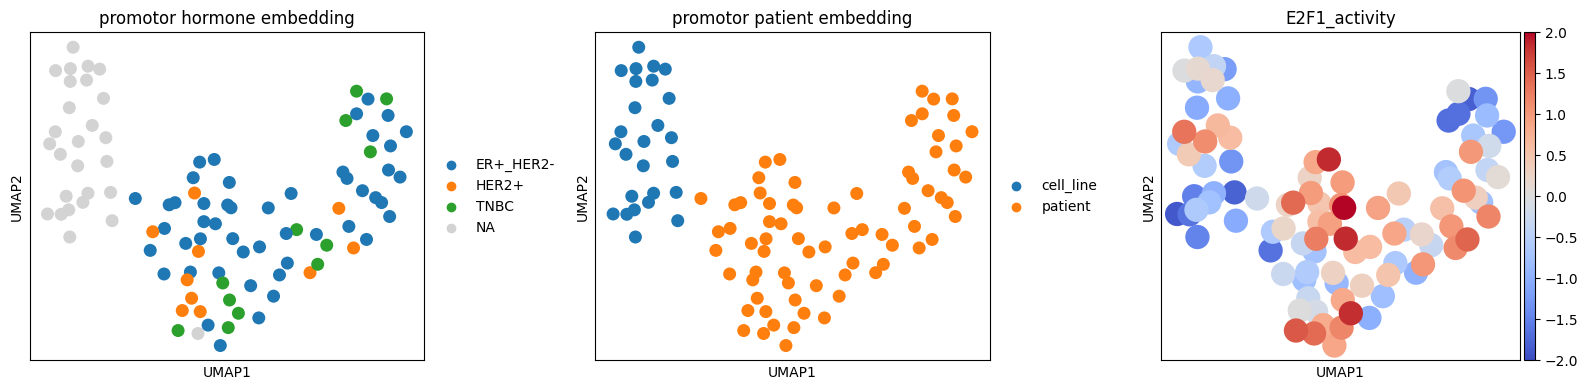

In [11]:
f, axs = plt.subplots(ncols=3, figsize=(16, 4))
sc.pp.neighbors(ad, use_rep='projection')
sc.tl.umap(ad)
sc.tl.leiden(ad)
sc.pl.umap(ad, color='Hormone',size=350, title = f'{type_data} hormone embedding', ax=axs[0], show=False)
sc.pl.umap(ad, color='Patient',size=350, title = f'{type_data} patient embedding', ax=axs[1], show=False)
sc.pl.umap(ad, color=f'{motif}_activity', ax=axs[2], cmap='coolwarm', vmin=-2, vmax=2,show=False)
f.tight_layout()